In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import os
import glob
import time

In [82]:
import seaborn as sns

In [80]:
df = pd.read_csv('all_kaggle_datasets.csv')
print(df.columns)
#df.head()

Index(['categories', 'commonFileTypes', 'creatorName', 'creatorUrl',
       'creatorUserId', 'currentDatasetVersionId',
       'currentDatasetVersionNumber', 'datasetId', 'datasetSize', 'datasetUrl',
       'dateUpdated', 'diffType', 'downloadCount', 'forumUrl',
       'isCollaborator', 'isDeleted', 'isFailed', 'isFeatured', 'isHidden',
       'isPrivate', 'isSuperFeatured', 'licenseName', 'licenseShortName',
       'maintainerOrganization', 'overview', 'ownerAvatarUrl', 'ownerName',
       'ownerUrl', 'ownerUserId', 'scriptCount', 'scriptsUrl',
       'thumbnailImageUrl', 'title', 'topicCount', 'type', 'viewCount',
       'voteButton'],
      dtype='object')


In [128]:
#df.title

In [41]:
selected_columns = ['commonFileTypes', 'creatorUserId', 'datasetId', 'datasetSize', 'isCollaborator', 'downloadCount', 'ownerUserId', 'ownerName', 'type', 'viewCount', 'voteButton']
df = df[selected_columns]

In [42]:
df.shape

(13020, 11)

In [43]:
df['file_type'] = df.commonFileTypes.apply(lambda x: x[2:-2]).str.split(',').apply(lambda x: x[0].split(':')[-1].strip()[1:-1])

In [44]:
df.shape

(13020, 12)

In [45]:
df['file_type'].unique()

array(['csv', 'other', 'json', 'sqlite', ''], dtype=object)

In [46]:
df.shape

(13020, 12)

In [47]:
# removing the rows with empty file type
df = df[~df.file_type.isin([''])]

In [48]:
df.shape

(13018, 12)

In [49]:
df.columns


Index(['commonFileTypes', 'creatorUserId', 'datasetId', 'datasetSize',
       'isCollaborator', 'downloadCount', 'ownerUserId', 'ownerName', 'type',
       'viewCount', 'voteButton', 'file_type'],
      dtype='object')

In [50]:
df = df.drop('commonFileTypes', axis = 1)
df.shape

(13018, 11)

In [51]:
df.head()

,creatorUserId,datasetId,datasetSize,isCollaborator,downloadCount,ownerUserId,ownerName,type,viewCount,voteButton,file_type
0,1314380,70947,4043536,False,5506,NaN,Kaggle,fileset,274306,"{'totalVotes': 678, 'hasAlreadyVotedUp': False...",csv
1,459483,83790,968989653,False,7,459483.0,Jason King,fileset,176,"{'totalVotes': 2, 'hasAlreadyVotedUp': False, ...",other
2,1227281,38809,5621145,False,14066,1227281.0,Mehdi Dagdoug,fileset,80770,"{'totalVotes': 298, 'hasAlreadyVotedUp': False...",csv
3,484516,45286,45177047,False,2573,NaN,Center for Policing Equity,fileset,52192,"{'totalVotes': 282, 'hasAlreadyVotedUp': False...",other
4,1914606,28335,609430422,False,517,1914606.0,Danil,fileset,4086,"{'totalVotes': 42, 'hasAlreadyVotedUp': False,...",other


In [52]:
df['total_vote'] = df.voteButton.apply(lambda x: x[2:-2]).str.split(',').apply(lambda x: int(x[0].split(':')[-1].strip()))

In [53]:
df.head()

,creatorUserId,datasetId,datasetSize,isCollaborator,downloadCount,ownerUserId,ownerName,type,viewCount,voteButton,file_type,total_vote
0,1314380,70947,4043536,False,5506,NaN,Kaggle,fileset,274306,"{'totalVotes': 678, 'hasAlreadyVotedUp': False...",csv,678
1,459483,83790,968989653,False,7,459483.0,Jason King,fileset,176,"{'totalVotes': 2, 'hasAlreadyVotedUp': False, ...",other,2
2,1227281,38809,5621145,False,14066,1227281.0,Mehdi Dagdoug,fileset,80770,"{'totalVotes': 298, 'hasAlreadyVotedUp': False...",csv,298
3,484516,45286,45177047,False,2573,NaN,Center for Policing Equity,fileset,52192,"{'totalVotes': 282, 'hasAlreadyVotedUp': False...",other,282
4,1914606,28335,609430422,False,517,1914606.0,Danil,fileset,4086,"{'totalVotes': 42, 'hasAlreadyVotedUp': False,...",other,42


In [54]:
df = df.drop('voteButton', axis = 1)
df.head()

,creatorUserId,datasetId,datasetSize,isCollaborator,downloadCount,ownerUserId,ownerName,type,viewCount,file_type,total_vote
0,1314380,70947,4043536,False,5506,NaN,Kaggle,fileset,274306,csv,678
1,459483,83790,968989653,False,7,459483.0,Jason King,fileset,176,other,2
2,1227281,38809,5621145,False,14066,1227281.0,Mehdi Dagdoug,fileset,80770,csv,298
3,484516,45286,45177047,False,2573,NaN,Center for Policing Equity,fileset,52192,other,282
4,1914606,28335,609430422,False,517,1914606.0,Danil,fileset,4086,other,42


In [55]:
df = df.drop('isCollaborator', axis = 1)
df.shape

(13018, 10)

In [56]:
df.head()

,creatorUserId,datasetId,datasetSize,downloadCount,ownerUserId,ownerName,type,viewCount,file_type,total_vote
0,1314380,70947,4043536,5506,NaN,Kaggle,fileset,274306,csv,678
1,459483,83790,968989653,7,459483.0,Jason King,fileset,176,other,2
2,1227281,38809,5621145,14066,1227281.0,Mehdi Dagdoug,fileset,80770,csv,298
3,484516,45286,45177047,2573,NaN,Center for Policing Equity,fileset,52192,other,282
4,1914606,28335,609430422,517,1914606.0,Danil,fileset,4086,other,42


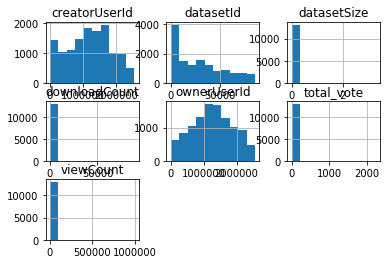

In [57]:
df.hist();

In [58]:
df_fileset = df[df.type == 'fileset']

In [59]:
df_fileset.shape


(12955, 10)

In [60]:
df_fileset = df_fileset.drop('type', axis = 1)
df_fileset.head()

,creatorUserId,datasetId,datasetSize,downloadCount,ownerUserId,ownerName,viewCount,file_type,total_vote
0,1314380,70947,4043536,5506,NaN,Kaggle,274306,csv,678
1,459483,83790,968989653,7,459483.0,Jason King,176,other,2
2,1227281,38809,5621145,14066,1227281.0,Mehdi Dagdoug,80770,csv,298
3,484516,45286,45177047,2573,NaN,Center for Policing Equity,52192,other,282
4,1914606,28335,609430422,517,1914606.0,Danil,4086,other,42


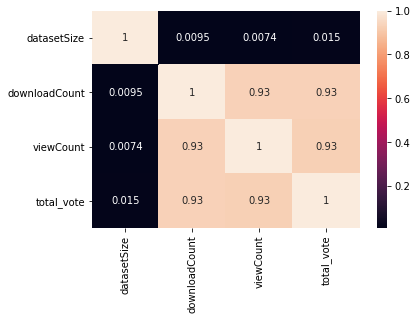

In [84]:
# correlation fo datasetSize, downloadCount, viewCount and total_vote
sns.heatmap(df_fileset[['datasetSize', 'downloadCount', 'viewCount', 'total_vote']].corr(), annot=True)

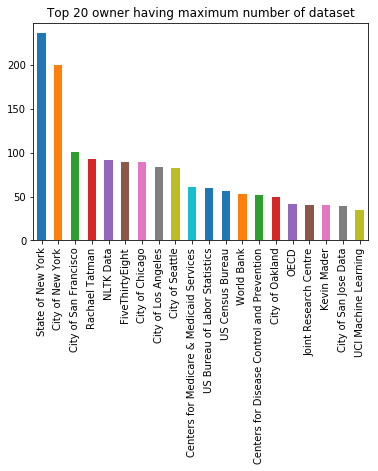

In [123]:
# Top 20 owner having maximum number of dataset
top_20_owner = df_fileset.ownerName.value_counts()[:20]
top_20_owner.plot(kind = 'bar', title = 'Top 20 owner having maximum number of dataset')

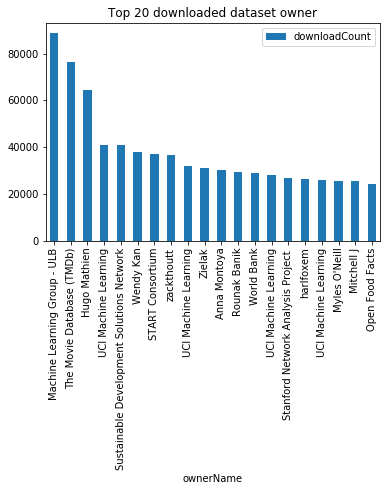

In [121]:
# Top 20 downloaded dataset owner
top_20_downloads = df_fileset[['ownerName', 'downloadCount']].sort_values(by = 'downloadCount', ascending = False)[:20]
top_20_downloads.set_index('ownerName').plot(kind = 'bar', title = 'Top 20 downloaded dataset owner')

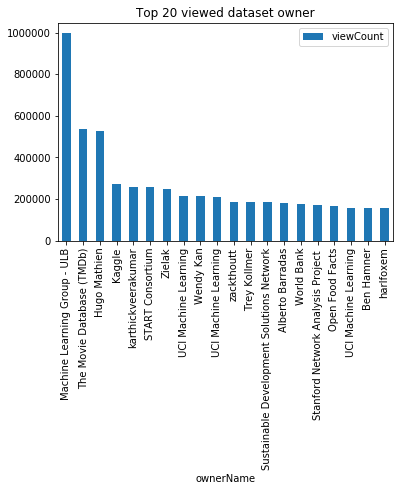

In [122]:
# Top 20 viewed dataset owner
top_20_downloads = df_fileset[['ownerName', 'viewCount']].sort_values(by = 'viewCount', ascending = False)[:20]
top_20_downloads.set_index('ownerName').plot(kind = 'bar', title = 'Top 20 viewed dataset owner')

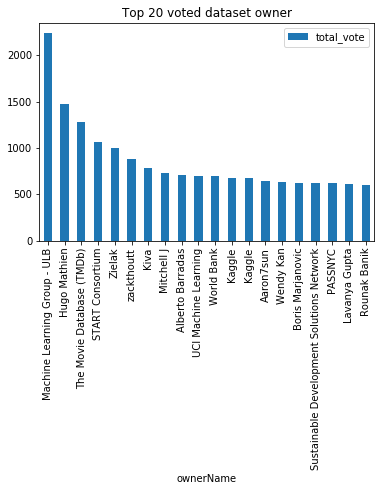

In [120]:
# Top 20 voted dataset owner
top_20_downloads = df_fileset[['ownerName', 'total_vote']].sort_values(by = 'total_vote', ascending = False)[:20]
top_20_downloads.set_index('ownerName').plot(kind = 'bar', title = 'Top 20 voted dataset owner')

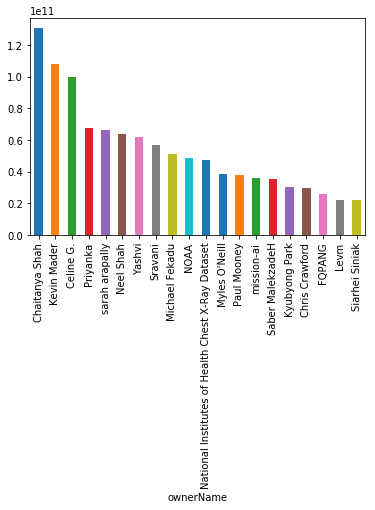

In [127]:
# contribution to dataset with total size
df_fileset.groupby('ownerName').sum()['datasetSize'].sort_values(ascending = False)[:20].plot(kind = 'bar')

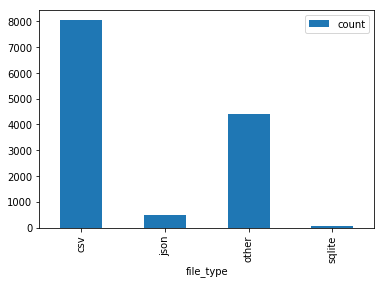

In [139]:
# distribution of file types of dataset
df_fileset[['file_type', 'ownerName']].groupby('file_type').count().rename(columns = {'ownerName': 'count'}).plot(kind = 'bar')